In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import math
import sys
from imgaug import augmenters as iaa
import random
from datetime import datetime
import os
from imgaug import augmenters as iaa
import seaborn as sns

In [2]:
os.chdir('G:\\')

Download  [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) (Python Version) and save in the path above

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

Meta, Train, and Test are dictionaries containing our data.

In [4]:
meta = unpickle('cifar-100-python/cifar-100-python/meta')
train = unpickle('cifar-100-python/cifar-100-python/train')
test = unpickle('cifar-100-python/cifar-100-python/test')

## Classes

In [5]:
Classes = pd.DataFrame(meta[b'fine_label_names'],columns = ['Classes'])

In [6]:
X = train[b"data"] 

In [7]:
X = X.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

## Sample Images

Classes    b'rabbit'
Name: 65, dtype: object

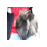

In [8]:
img_num = np.random.randint(0,1000)
plt.figure(figsize=(.6,.6))
plt.xticks([])
plt.yticks([])
plt.imshow(X[img_num])
Classes.iloc[train[b'fine_labels'][img_num]]

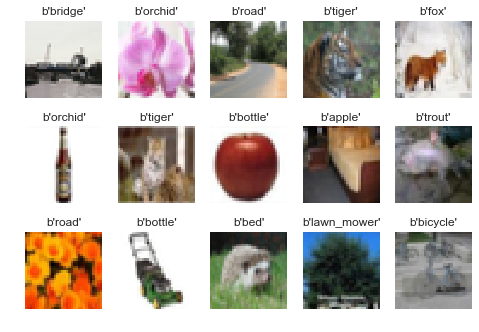

In [9]:
num_images_row = 3
num_images_column = 5
img_nums = np.random.randint(0,len(X),num_images_row*num_images_column)

f, axarr = plt.subplots(num_images_row,num_images_column)

for i in range(0,num_images_row):
    for j in range(0,num_images_column):
        axarr[i,j].imshow(X[img_nums[(i*num_images_column)+j]])
        axarr[i,j].set_title(str(Classes.iloc[train[b'fine_labels'][img_nums[(i+1)*(j+1)-1]]]).split()[1])
        axarr[i,j].axis('off')

## Data Augmentation

If you want to try out other techniques you can check out the [documentation](https://github.com/aleju/imgaug)

In [10]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.CropAndPad(px=(-2, 2),sample_independently=True,pad_mode=["constant", "edge"]),
    iaa.Affine(shear=(-10, 10),mode = ['symmetric','wrap']),#48
    iaa.Add((-5, 5)),
    iaa.Multiply((0.8, 1.2)),

],random_order=True)

Applying data augmentation to our dataset. This takes a while.

In [11]:
X1 = seq.augment_images(X)

I multiplied the data by 10 fold. However it takes a long time for the computer to do this.

In [12]:

X2 = seq.augment_images(X)
X3 = seq.augment_images(X)
X4 = seq.augment_images(X)
X5 = seq.augment_images(X)
X6 = seq.augment_images(X)
X7 = seq.augment_images(X)
X8 = seq.augment_images(X)
X9 = seq.augment_images(X)
X10 = seq.augment_images(X)


### Sample Data Augmentation </br>
(Compare the plot below with the above plot)

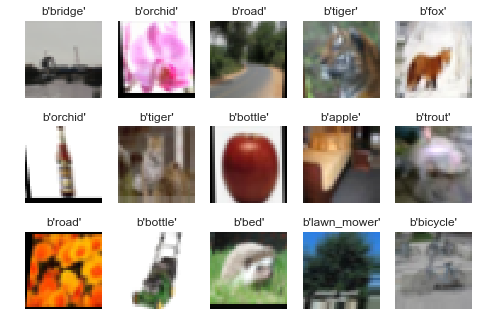

In [14]:
num_images_row = 3
num_images_column = 5

f, axarr = plt.subplots(num_images_row,num_images_column)

for i in range(0,num_images_row):
    for j in range(0,num_images_column):
        axarr[i,j].imshow(X1[img_nums[(i*num_images_column)+j]])
        axarr[i,j].set_title(str(Classes.iloc[train[b'fine_labels'][img_nums[(i+1)*(j+1)-1]]]).split()[1])
        axarr[i,j].axis('off')

Notice the subtle changes in the images. The images cannot be too different because the resulting image still needs to be recognizable yet different enough to fool the model.

Basically, you can add augmented data however much you want. I will only add 1 set since it takes a long time

In [15]:
all_train = []
all_train.extend(X/255)
all_train.extend(X1/255)

In [16]:

all_train.extend(X2/255)
all_train.extend(X3/255)
all_train.extend(X4/255)
all_train.extend(X5/255)
all_train.extend(X6/255)
all_train.extend(X7/255)
all_train.extend(X8/255)
all_train.extend(X9/255)
all_train.extend(X10/255)


We are dividing the values by 255 because this helps the model find the minima.

In [17]:
all_labels = []
all_labels.extend(train[b'fine_labels'])
all_labels.extend(train[b'fine_labels'])

In [18]:

all_labels.extend(train[b'fine_labels'])
all_labels.extend(train[b'fine_labels'])
all_labels.extend(train[b'fine_labels'])
all_labels.extend(train[b'fine_labels'])
all_labels.extend(train[b'fine_labels'])
all_labels.extend(train[b'fine_labels'])
all_labels.extend(train[b'fine_labels'])
all_labels.extend(train[b'fine_labels'])


In [19]:
len(all_train) == len(all_labels)

False

We are going to shuffle the data to randomize any pattern in the order of the dataset.

In [20]:
all_train_shuffled = []
all_labels_shuffled = []

combined = list(zip(all_train, all_labels))
random.shuffle(combined)

all_train_shuffled[:], all_labels_shuffled[:] = zip(*combined)

In [21]:
num_class = 100

In [22]:
all_train_shuffled = np.asarray(all_train_shuffled)

In [23]:
all_train_shuffled = np.asarray(all_train_shuffled)

In [24]:
(all_train_shuffled).shape

(500000, 32, 32, 3)

In [25]:
train_len = len(all_train_shuffled)

In [26]:
def one_hot_encode(vec, vals=num_class):
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [27]:
all_labels_shuffled= one_hot_encode(all_labels_shuffled, num_class)

In [28]:
test_shuffled = np.vstack(test[b"data"])
test_len = len(test_shuffled)

In [29]:
test_shuffled = test_shuffled.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
test_labels = one_hot_encode(test[b'fine_labels'], num_class)

In [30]:
all_train_shuffled.shape

(500000, 32, 32, 3)

In [31]:
all_labels_shuffled.shape

(500000, 100)

In [32]:
test_shuffled.shape

(10000, 32, 32, 3)

In [33]:
test_labels.shape

(10000, 100)

Were feeding the data into the model one small batch at a time. This is increases speed and it is good because it updates the gradient more often. 

In [34]:
mini_batch_size = 100

In [35]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        self.training_images = all_train_shuffled
        self.training_labels = all_labels_shuffled
        
        self.test_images = test_shuffled
        self.test_labels = test_labels
        
    def next_batch(self, batch_size=mini_batch_size):
        
        x = self.training_images[self.i:self.i+batch_size].reshape(100,32,32,3)
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y
ch = CifarHelper()

## Tensorflow

Placeholders are tensorflow's variables that do not require initial values

In [36]:
x = tf.placeholder(tf.float32,shape=[None,32,32,3])
y_true = tf.placeholder(tf.float32,shape=[None,num_class])

In [37]:
hold_prob = tf.placeholder(tf.float32)

Helper functions for initializing layers

In [38]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [39]:
num_class = 100

### Model

In [40]:
convo_1 = convolutional_layer(x,shape=[3,3,3,32])

convo_2 = convolutional_layer(convo_1,shape=[3,3,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

convo_3 = convolutional_layer(convo_2_pooling,shape=[3,3,64,128])
convo_4 = convolutional_layer(convo_3,shape=[3,3,128,256])
convo_4_pooling = max_pool_2by2(convo_4)

convo_2_flat = tf.reshape(convo_4_pooling,[-1,8*8*256])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))
full_one_dropout = tf.nn.dropout(full_layer_one,hold_prob)
y_pred = normal_full_layer(full_one_dropout,num_class)


Loss Function

In [41]:
softmaxx = tf.nn.softmax_cross_entropy_with_logits(labels = y_true,logits = y_pred)

In [42]:
cross_entropy = tf.reduce_mean(softmaxx)

This is our optimizer. We are not using gradient decent, we are using Adam which is a million times better. 0.001 is the learning rate. 

In [43]:
optimizer = tf.train.AdamOptimizer(.001)
train = optimizer.minimize(cross_entropy)

In [44]:
init = tf.global_variables_initializer()

You dont have to run the below cell because its for the gpu

In [45]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [46]:
saver = tf.train.Saver()

Running the model. This might take a very long time. 

2017-12-05 19:57:42.661479

STEP: 400
Train Accuracy:
0.15
TEST ACCURACY:
0.111100001261


STEP: 800
Train Accuracy:
0.22
TEST ACCURACY:
0.183199999481


STEP: 1200
Train Accuracy:
0.22
TEST ACCURACY:
0.242899999768


STEP: 1600
Train Accuracy:
0.3
TEST ACCURACY:
0.2909000054


STEP: 2000
Train Accuracy:
0.33
TEST ACCURACY:
0.314700002968


STEP: 2400
Train Accuracy:
0.36
TEST ACCURACY:
0.337300002575


STEP: 2800
Train Accuracy:
0.44
TEST ACCURACY:
0.358999998868


STEP: 3200
Train Accuracy:
0.33
TEST ACCURACY:
0.38599999547


STEP: 3600
Train Accuracy:
0.43
TEST ACCURACY:
0.404600004852


STEP: 4000
Train Accuracy:
0.37
TEST ACCURACY:
0.417799991369


STEP: 4400
Train Accuracy:
0.59
TEST ACCURACY:
0.427800002694


STEP: 4800
Train Accuracy:
0.56
TEST ACCURACY:
0.444499990344


STEP: 5200
Train Accuracy:
0.52
TEST ACCURACY:
0.442499996722


STEP: 5600
Train Accuracy:
0.61
TEST ACCURACY:
0.462599998713


STEP: 6000
Train Accuracy:
0.54
TEST ACCURACY:
0.470699994266


STEP: 6400
Train A

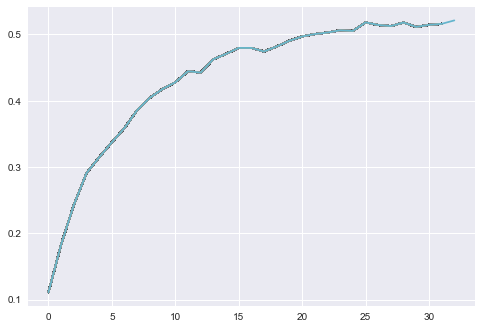

In [47]:
%%time
epoch = 200000
print(str(datetime.now())+'\n')
minibatch_check = 500
accuracy_list = []
accuracy = 0
target_accuracy  = .52
with tf.Session(config = config) as sess:
    
    sess.run(init)
    i = 0
    while (accuracy<target_accuracy):
        i = i+1
        
        batch = ch.next_batch(100)
        
        sess.run(train,feed_dict = {x:batch[0],y_true:batch[1],hold_prob:0.5})
        
        if i % 400 == 0:
            print("STEP: {}".format(i))
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            
            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            
            print('Train Accuracy:')
            print(sess.run(acc,feed_dict = {x:batch[0],y_true:batch[1],hold_prob:1.0}))
            
            #NEW
            batch_accuracy = []
            for k in range(0,int(len(test_shuffled)/minibatch_check)):
                batch_accuracy.append(sess.run(acc,feed_dict={x:test_shuffled[minibatch_check*(k):minibatch_check*(k+1)],
                                                              y_true:test_labels[minibatch_check*(k):minibatch_check*(k+1)],
                                                              hold_prob:1.0}))
            print('TEST ACCURACY:')   
            accuracy = sum(batch_accuracy) / (len(batch_accuracy))
            print(accuracy)
            accuracy_list.append(accuracy)
            print('\n') 

             
            
        if (accuracy>target_accuracy):
            saver.save(sess,'G:/models/model53.ckpt')
            
        plt.plot(accuracy_list)  

Restore the model

In [56]:
model_path = 'models/model53.ckpt'

In [57]:
cuts = 200
predictions = []
with tf.Session() as sess:
    
    saver.restore(sess,model_path)

    probabilities = tf.nn.softmax(y_pred)
    matches2 = softmaxx
    acc2 = tf.cast(probabilities,tf.float32)
    for k in range(0,int(len(test_shuffled)/cuts)):
        predictions.extend(sess.run(acc2,feed_dict={x:test_shuffled[cuts*(k):cuts*(k+1)],
                                                      y_true:test_labels[cuts*(k):cuts*(k+1)],
                                                      hold_prob:1.0}))
    predictions = np.array(predictions)

INFO:tensorflow:Restoring parameters from models/model53.ckpt


In [58]:
predictions.shape

(10000, 100)

# Save predictions to CSV

In [59]:
output = pd.DataFrame(predictions)
output.to_csv('predictions.csv')

In [60]:
predictions_df = np.argmax(predictions,1)
predictions_df = pd.DataFrame(predictions_df)
predictions_df.to_csv('predictions_df.csv')

In [61]:
test_labels_df = np.argmax(test_labels,1)
test_labels_df = pd.DataFrame(test_labels_df)
test_labels_df.to_csv('test_labels.csv')

In [62]:
Classes = pd.DataFrame(Classes)
Classes.to_csv('Classes.csv')

# Compare Actual Value with Predicted Value

Put a number between 0 to 10000 in img_num

True Label: b'trout'
Prediction: b'trout'


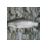

In [63]:
img_num = 250
plt.figure(figsize=(.6,.6))
plt.xticks([])
plt.yticks([])
plt.imshow(test_shuffled[img_num])

labels_not_onehot = np.argmax(test_labels,1)
Classes.iloc[labels_not_onehot[img_num]]
print('True Label: '+str(Classes.iloc[labels_not_onehot[img_num]]).split()[1])
print('Prediction: '+str(Classes.iloc[predictions_df.iloc[img_num]]).split()[2])

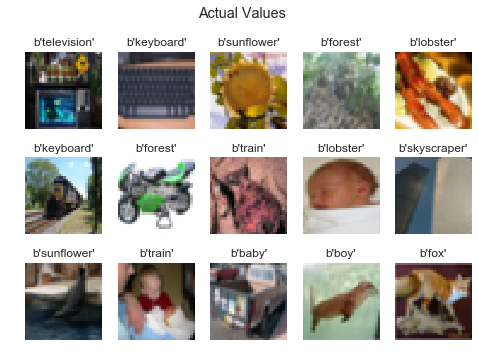

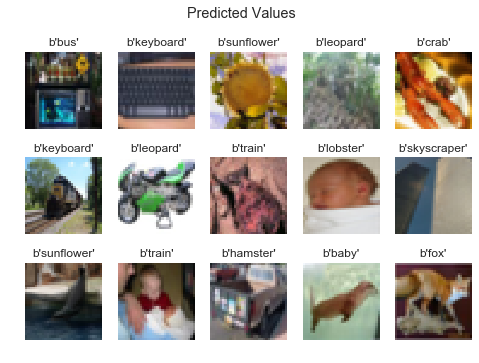

In [64]:
num_images_row = 3
num_images_column = 5

f, axarr = plt.subplots(num_images_row,num_images_column)
img_nums = np.random.randint(0,len(test_shuffled),num_images_row*num_images_column)


for i in range(0,num_images_row):
    for j in range(0,num_images_column):
        axarr[i,j].imshow(test_shuffled[img_nums[(i*num_images_column)+j]])
        axarr[i,j].set_title(str(Classes.iloc[labels_not_onehot[img_nums[(i+1)*(j+1)-1]]]).split()[1])
        axarr[i,j].axis('off')
        f.suptitle('Actual Values')

f1, axarr1 = plt.subplots(num_images_row,num_images_column)

for i in range(0,num_images_row):
    for j in range(0,num_images_column):
        axarr1[i,j].imshow(test_shuffled[img_nums[(i*num_images_column)+j]])
        axarr1[i,j].set_title(str(Classes.iloc[predictions_df.iloc[img_nums[(i+1)*(j+1)-1]]]).split()[2])
        axarr1[i,j].axis('off')
        f1.suptitle('Predicted Values')

# Input an Image

In [65]:
os.getcwd()

'G:\\'

# Helper Function

In [66]:
def plot_prediction(image):
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (32, 32)) 
    try_out = []
    try_out.append(resized_image/255)

    
    predictions = []
    with tf.Session() as sess:

        saver.restore(sess,model_path)

        probabilities = tf.nn.softmax(y_pred)
        matches2 = softmaxx
        acc2 = tf.cast(probabilities,tf.float32)

        predictions.extend(sess.run(acc2,feed_dict={x:try_out,hold_prob:1.0}))
        predictions = np.array(predictions)

        predictions_df = pd.DataFrame(predictions).T
        predictions_df = predictions_df.sort_values(0,ascending=0)
        predictions_df = predictions_df[:10].T
        predictions_df.columns = Classes.iloc[predictions_df.columns.values]


        columns = predictions_df.columns
        columns_list = []
        for i in range(len(columns)):
            columns_list.append(str(columns[i])[3:-3])

        columns_list = pd.DataFrame(columns_list)
        predictions_df.columns = pd.DataFrame(columns_list)

        predictions_df = predictions_df.T
        predictions_df.columns=['Probability']
        predictions_df['Prediction'] = predictions_df.index
        
        f, axarr = plt.subplots(1,2, figsize=(10,4))

        axarr[0].imshow(img)
        axarr[0].axis('off')

        axarr[1] = sns.barplot(x="Probability", y="Prediction", data=predictions_df,color="red",)
        sns.set_style(style='white')

        axarr[1].set_ylabel('')    
        axarr[1].set_xlabel('')
        axarr[1].grid(False)
        axarr[1].spines["top"].set_visible(False)
        axarr[1].spines["right"].set_visible(False)
        axarr[1].spines["bottom"].set_visible(False)
        axarr[1].spines["left"].set_visible(False)
        
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

        f.suptitle("Model Prediction")
        f.subplots_adjust(top=0.88)

INFO:tensorflow:Restoring parameters from models/model53.ckpt


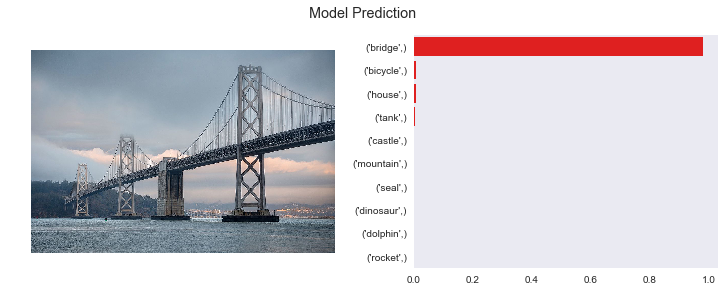

In [67]:
plot_prediction('img1.jpg')

INFO:tensorflow:Restoring parameters from models/model53.ckpt


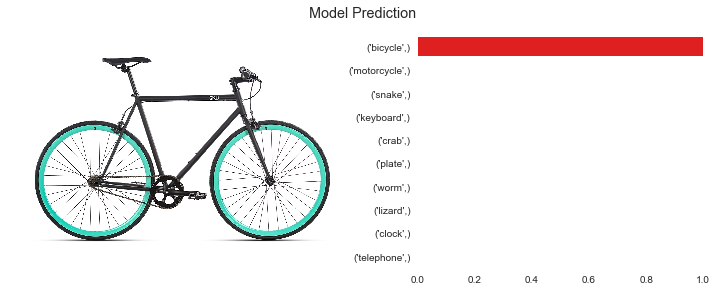

In [68]:
plot_prediction('img2.jpeg')

INFO:tensorflow:Restoring parameters from models/model53.ckpt


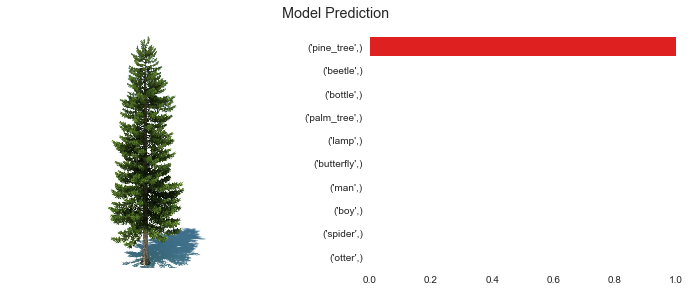

In [69]:
plot_prediction('img3.jpg')

INFO:tensorflow:Restoring parameters from models/model53.ckpt


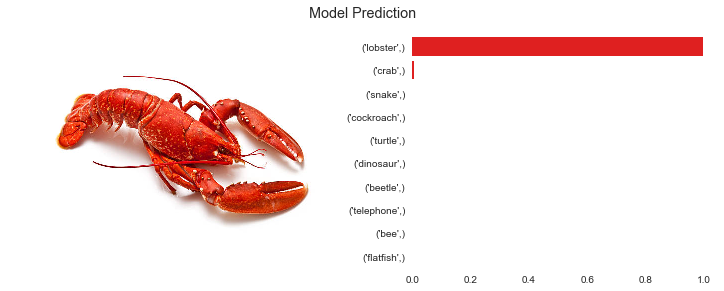

In [70]:
plot_prediction('img4.jpg')

INFO:tensorflow:Restoring parameters from models/model53.ckpt


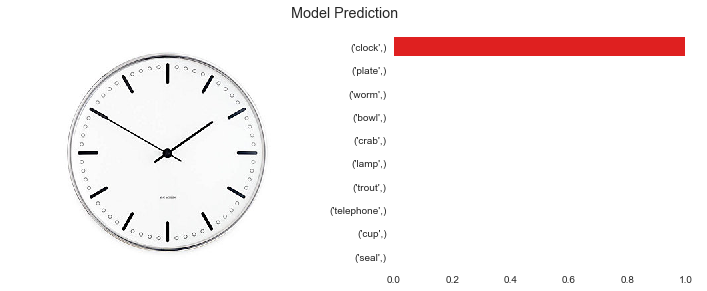

In [71]:
plot_prediction('img5.jpg')

INFO:tensorflow:Restoring parameters from models/model53.ckpt


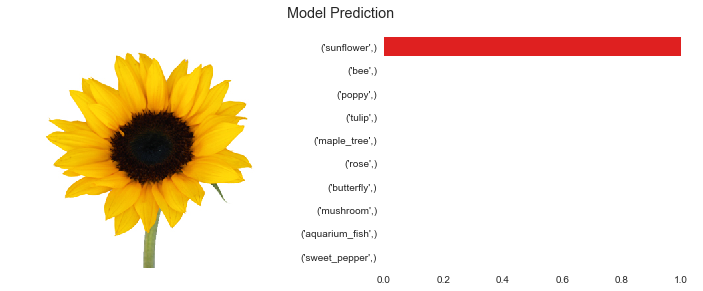

In [72]:
plot_prediction('img6.jpg')

INFO:tensorflow:Restoring parameters from models/model53.ckpt


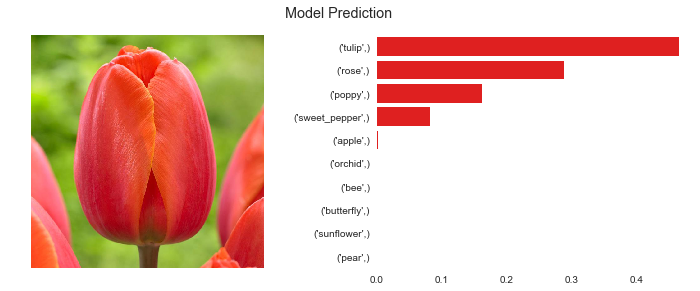

In [73]:
plot_prediction('img7.jpg')